# Practical for 'introduction to the NCAS CF Data Tools, cf-python and cf-plot'

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> these green boxes provide instructions and tips about doing this practical (blue boxes are the same as in the teaching notebook and provide useful information). First of all, there is a copy of the context and learning objectives from the main/presented Notebook below - you are advised to re-read this as a reminder. There is also a copy of the final section from the main Notebook which provides links to further information - you might find the documentation links especially useful here, so they are highlighted in bold.
</div>

## A reminder: context, learning objectives and guidance links

### What are the NCAS CF Data Tools and why do they all have 'cf' in the name?

The _NCAS CF Data Tools_ are a suite of complementary Python libraries which are designed to facilitate working with data for research in the earth sciences and aligned domains. The two that are of most relevance to the average user, and those wanting to process, analyse and visualise atmospheric data, are *cf-python* (https://ncas-cms.github.io/cf-python/) and *cf-plot* (https://ncas-cms.github.io/cf-plot/build/). We will be focusing on use of cf-python and cf-plot today.

The 'cf' in the names of the NCAS CF Data Tools corresponds to the _CF Conventions_, a metadata standard, because they are built around this standard in the form of using the CF Data Model, which as well as performance is considered a 'unique selling point' of the tools.


### What are the CF Conventions?

The _CF Conventions_, usually referred to in this way but also know by the full name of the **C**limate and **F**orecast (CF) metadata conventions, are a metadata standard which is becoming the de-facto convention to cover the description of geoscientific data so that sharing and intercomparison is simpler. See https://cfconventions.org/ for more information.


### What are we going to learn in this session?

Our **learning aim** is to be able to use the NCAS CF Data Tools Python libraries, namely cf-python and cf-plot to process, analyse and visualise netCDF and PP datasets, whilst appreciating the context and 'unique selling point' of the libraries as being built to use the CF Conventions, a metadata standard for earth science data, to make it simpler to do what you want to do with the datasets, by working on top of a Data Model for CF.

We have **six distinct objectives**, matching the sections in this notebook and in the practical notebook you will work through. By the end of this lesson you should be familiar and have practiced using cf-python and cf-plot to:

1. read dataset(s) and view the (meta)data at different detail levels;
2. edit the (meta)data and write out the edited version to file;
3. reduce datasets by subspacing and collapsing;
4. visualise datasets as contour and vector plots;
5. analyse data: applying mathematical and statistical operations and plotting trends;
6. change the underlying grid of data through regridding.

### Guidance: where to find more information and resources on the NCAS CF Data Tools

Here are some links relating to the NCAS CF Data Tools and this training.

* This training, with further material, is hosted online and there are instructions for setting up the environment so you can work through it in your own time: https://github.com/NCAS-CMS/cf-tools-training.
* **The cf-python documentation lives at https://ncas-cms.github.io/cf-python/.**
* The cf-python code lives on GitHub at https://github.com/NCAS-CMS/cf-python. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-python/issues.
* **The cf-plot documentation lives at https://ncas-cms.github.io/cf-plot/build/.**
* The cf-plot code lives on GitHub at https://github.com/NCAS-CMS/cf-plot. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-plot/issues.
* There is a technical presentation about the NCAS CF Data Tools avaialble from https://hps.vi4io.org/_media/events/2020/summer-school-cfnetcdf.pdf.
* The website of the CF Conventions can be found at https://cfconventions.org/.
* The landing page for training into the CF Conventions is found here within the website above: https://cfconventions.org/Training/.

If you have any queries after this course, please either use the Issue Trackers linked above or you can email me at: sadie.bartholomew@ncas.ac.uk.

***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> run all of the cells in this section to do the set up.
</div>

## Setting up

**In this section we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries within this notebook.**

Run some set up for nice outputs in this Jupyter Notebook (not required in interactive Python or a script):

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import cf-python and cf-plot:

In [2]:
import cfplot as cfp
import cf

Inspect the versions of cf-python and cf-plot and the version of the CF Conventions those are matched to:

In [3]:
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

cf-python version is: 3.17.0
cf-plot version is: 3.3.0
CF Conventions version is: 1.11


<div class="alert alert-block alert-info">
<i>Note:</i> you can work with data compliant by any other version of the CF Conventions, or without (much) compliance, but the CF Conventions version gives the maximum version that these versions of the tools understand the features of.
</div>

Finally, see what datasets we have to explore:

<div class="alert alert-block alert-info">
<i>Note:</i> in a Jupyter Notebook, '!' preceeeds a shell command, so this is a terminal command and not Python
</div>

In [4]:
!ls ../ncas_data

aaaaoa.pmh8dec.pp			   precip_1D_yearly.nc
alpine_precip_DJF_means.nc		   precip_2010.nc
data1.nc				   precip_DJF_means.nc
data1-updated.nc			   qbo.nc
data2.nc				   regions.nc
data3.nc				   ta.nc
data5.nc				   tripolar.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  two_fields.nc
land.nc					   ua.nc
model_precip_DJF_means_low_res.nc	   u_n216.nc
model_precip_DJF_means.nc		   u_n96.nc
n2o_emissions.nc			   vaAMIPlcd_DJF.nc
POLCOMS_WAM_ZUV_01_16012006.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc


***

<div class="alert alert-block alert-success">
<i>Practical instructions:</i> now we can start the practical. We will follow the same sectioning as in the teaching notebook, so please consult the notes there in the matching section for guidance and you can also consult the cf-python and cf-plot documentation linked above.
</div>

## 1. Reading dataset(s) and viewing the (meta)data at different detail levels

**In this section we look at the basic use of cf-python, reading in one or more datasets from file and inspecting the data and the metadata at different levels of detail to suit the amount of information you want to see.**

### a) Reading in data and extracting the _field_ of interest

**1.a.1)** Use `cf` to read in the netCDF dataset `qbo.nc` which is found (as shown at the end of the section above) under the directory `../ncas_data`, assigning it to a variable called 'fieldlist'.


In [5]:
fieldlist = cf.read("../ncas_data/qbo.nc")

**1.a.2)** Use the standard Python function `len` to see how long the read-in fieldlist is.

In [6]:
len(fieldlist)

1

**1.a.3)** Access the first field in the fieldlist and assign it to the variable name 'field'.

In [7]:
field = fieldlist[0]

### b) Inspecting the _field_ of interest with different amounts of detail

**1.b.1)** View the field from (1.a.3) above in minimal detail.

In [8]:
field

<CF Field: eastward_wind(time(398), pressure(37), latitude(2), longitude(48)) m s**-1>

**1.b.2)** Now try viewing the field from (1.a.3) above at a medium detail level.

In [9]:
print(field)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(398), pressure(37), latitude(2), longitude(48)) m s**-1
Dimension coords: time(398) = [1979-01-16 09:00:00, ..., 2012-02-15 09:00:00] gregorian
                : pressure(37) = [1000.0, ..., 1.0] mbar
                : latitude(2) = [30.0, 0.0] degrees_north
                : longitude(48) = [0.0, ..., 352.5] degrees_east


**1.b.3)** OK, finally let's see it in its full glory - with maximal detail. Take a minute or two to compare these outputs and familiarise yourself with the formats of the different views and how they present the metadata (and preview of the data) of a field.

In [10]:
field.dump()

------------------------------
Field: eastward_wind (ncvar%U)
------------------------------
Conventions = 'CF-1.7'
_FillValue = 2.0000000400817547e+20
long_name = 'U velocity'
missing_value = 2.0000000400817547e+20
name = 'U'
standard_name = 'eastward_wind'
time = '00:00'
title = 'U velocity'
units = 'm s**-1'

Data(time(398), pressure(37), latitude(2), longitude(48)) = [[[[0.48084383185078244, ..., 8.244485042555938]]]] m s**-1

Domain Axis: latitude(2)
Domain Axis: longitude(48)
Domain Axis: pressure(37)
Domain Axis: time(398)

Dimension coordinate: time
    calendar = 'gregorian'
    long_name = 't'
    standard_name = 'time'
    time_origin = '01-JAN-1979:00:00:00'
    units = 'days since 1979-01-01 00:00:00'
    Data(time(398)) = [1979-01-16 09:00:00, ..., 2012-02-15 09:00:00] gregorian

Dimension coordinate: pressure
    long_name = 'p'
    positive = 'down'
    standard_name = 'pressure'
    units = 'mbar'
    Data(pressure(37)) = [1000.0, ..., 1.0] mbar

Dimension coordinate: 

### c) Inspecting a metadata _construct_ e.g. _coordinate_ from the _field_ of interest

**1.c.1)** Let's assume we want to know about a specific metadata construct, in this case we are intereted in the pressure. Assign to a new variable called 'pressure' the pressure coordinate of the field stored in the variable 'field' from section (1a) as just inspected in section (1b).

In [11]:
pressure = field.coordinate("pressure")

**1.c.2)** View this coordinate with minimal detail level.

In [12]:
pressure

<CF DimensionCoordinate: pressure(37) mbar>

**1.c.3)** Now use the standard approach to view it with medium detail level.

In [13]:
print(pressure)

pressure(37) mbar


**1.c.4)** Finally, let's use the approach for full detail level and see everything about this coordinate.

In [14]:
pressure.dump()

Dimension coordinate: pressure
    long_name = 'p'
    positive = 'down'
    standard_name = 'pressure'
    units = 'mbar'
    Data(37) = [1000.0, ..., 1.0] mbar


### d) Inspecting a data array of interest

**1.d.1)** Access the underlying data of the pressure coordinate from the previous sub-section, (1c), assigning it to a variable called 'pressure_data'.

In [15]:
pressure_data = pressure.data

**1.d.2)** Inspect the pressure coordinate data with minimal detail, noticing the units.

In [16]:
pressure_data

<CF Data(37): [1000.0, ..., 1.0] mbar>

**1.d.3)** Access the data array of the pressure coordinate. Note that, because it is small, it is not computationally expensive to access this and similarly with other metadata data arrays, but accessing the underlying data array of the whole field (i.e. its main stored variable) could be intensive because for datasets in real usage the data can be very large and/or multi-dimensional.

In [17]:
pressure_array = pressure_data.array

**1.d.4)** Use the standard Python `print` function to view the pressure array.

In [18]:
print(pressure_array)

[1000.  975.  950.  925.  900.  875.  850.  825.  800.  775.  750.  700.
  650.  600.  550.  500.  450.  400.  350.  300.  250.  225.  200.  175.
  150.  125.  100.   70.   50.   30.   20.   10.    7.    5.    3.    2.
    1.]


***

## 2. Editing the (meta)data and writing out the edited version to file

**In this section we demonstrate how to change the data that has been read-in from file, both in terms of the data arrays and the metadata that describes it, and then how to write data back out to file with a chosen name, so that you can see how cf-python can be used to edit data or to make new data.**

### a) Changing the underlying data

**2.a.1)** Access the data (*not* the data array of the data) of the full field and assign it to a variable called 'data'.

In [19]:
data = field.data

**2.a.2)** Inspect the field data with medium detail use the `size` method on it to see its shape.

In [20]:
print(data)
data.shape

[[[[0.48084383185078244, ..., 8.244485042555938]]]] m s**-1


(398, 37, 2, 48)

**2.a.3)** Use the `size` method on it to see how many items (in this case, numbers) there are in it. Can you see how this relates to the `shape` above, and to the structure of the coordinates from the field inspection in (1.b.2)?

In [21]:
data.size

1413696

**2.a.4)**

In [22]:
first_time_subarray = data[0, :, :, :]
first_time_subarray

<CF Data(1, 37, 2, 48): [[[[0.48084383185078244, ..., -48.227509940620955]]]] m s**-1>

**2.a.5)** Change all of the values in the first time subarray to the value '-50.0'.

In [23]:
first_time_subarray[0] = -50
first_time_subarray

<CF Data(1, 37, 2, 48): [[[[-50.0, ..., -50.0]]]] m s**-1>

**2.a.6)** Access the index item `[1, :, 0, 0]` of the full data array from (2.a.1) and assign it to a variable called 'a_subarray'. Then check what shape it is and try to understand the size that emerges for that sub-array given that specific index.

In [24]:
a_subarray = data[1, 0, :, 0]
a_subarray.shape

(1, 1, 2, 1)

**2.a.7)** Change the values for this sub-array item to all ones i.e. `1.0`. Note to create an array populated all with the value one of the required shape to match the shape of the subarray from (2.a.6), you can use `numpy.ones(<desired shape>)` (you will need to import `numpy` first, and let's call the module `np` i.e. use `import numpy as np`).

In [25]:
import numpy as np
np.ones((1, 1, 2, 1))
data[1, 0, :, 0] = np.ones((1, 1, 2, 1))

**2.a.8)** Inspect 'a_subarray' again to confirm it has been set with values of all one.

In [26]:
a_subarray

<CF Data(1, 1, 2, 1): [[[[1.3802703676610288, 1.9310183931319973]]]] m s**-1>

### b) Changing some metadata

**2.b.1)** Take the 'pressure' variable coordinate we created in (1.c) and inspected in full detail in (1.c.4). Let's say we want to reverse the direction of this axes, so that the pressures increase in value along it (in order) rather than decreases. In `cf` we can do this using the `flip` method, which will adjust the data accordingly so that it is flipped in the corresponding way to match up to the new direction of the pressure axis.

Reassign `pressure` to itself with the `flip` method applied (note you can, alternatively and equivalently, call the method `flip` with the argument `inplace=True` set without re-assignment because that argument tells `cf` to adjust the variable in-place).

In [27]:
pressure = pressure.flip()
# Or: pressure.flip(inplace=True)

**2.b.2)** Now full inspect the pressure coordinate again with full detail to confirm that the flip of axis direction happened.

In [28]:
pressure.dump()

Dimension coordinate: pressure
    long_name = 'p'
    positive = 'down'
    standard_name = 'pressure'
    units = 'mbar'
    Data(37) = [1.0, ..., 1000.0] mbar


**2.b.3)** Notice the `standard_name`, which is a CF attribute used to identify the physical quantity in question, that must be one from the thousands of controlled options available in the CF Standard Name table (see https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html, you are encouraged to spend some minutes exploring this resource). At the moment the value in the field is not a valid standard name and it is also not specific enough to identify the variable well. 

Let's change it to the more descriptive valid CF Standard Name of 'air_pressure'. To do this, access the `standard_name` attribute of the pressure coordinate and re-set it to the string value desired.

In [29]:
pressure.standard_name = "air_pressure"

**2.b.4)** Once again view the pressure coordinate with maximal detail to see the two changes we made in this section. Also view the overall field in medium detail to see that these changes propagate through to the field object by Python object rules.

In [30]:
pressure.dump()

Dimension coordinate: air_pressure
    long_name = 'p'
    positive = 'down'
    standard_name = 'air_pressure'
    units = 'mbar'
    Data(37) = [1.0, ..., 1000.0] mbar


### c) Writing a (list of) fields out to a file

**2.c.1)** Let's write out a few fields to disk. We'll write our field from the previous sections as well as a new field all into the same file.

First let's get a new field. We could read in another file to access some new fields, but let's use one of the cf-python ready-made 'example fields', which are designed for exploring cf-python capability without the need for real (and large/memory-intensive) data. Run `cf.example_field()` with any integer from 0 to 11 inclusive to get an example field, assigning it to the variable called 'new_field'.

In [31]:
new_field = cf.example_field(1)  # Or: any integer from 0 to 11 works fine as the argument

**2.c.2)** Inspect this new field with medium level of detail.

In [32]:
print(new_field)

Field: air_temperature (ncvar%ta)
---------------------------------
Data            : air_temperature(atmosphere_hybrid_height_coordinate(1), grid_latitude(10), grid_longitude(9)) K
Cell methods    : grid_latitude(10): grid_longitude(9): mean where land (interval: 0.1 degrees) time(1): maximum
Field ancils    : air_temperature standard_error(grid_latitude(10), grid_longitude(9)) = [[0.76, ..., 0.32]] K
Dimension coords: atmosphere_hybrid_height_coordinate(1) = [20.0] m
                : grid_latitude(10) = [2.2, ..., -1.76] degrees
                : grid_longitude(9) = [-4.7, ..., -1.18] degrees
                : time(1) = [2019-01-01 00:00:00]
Auxiliary coords: latitude(grid_latitude(10), grid_longitude(9)) = [[53.941, ..., 50.225]] degrees_N
                : longitude(grid_longitude(9), grid_latitude(10)) = [[2.004, ..., 8.156]] degrees_E
                : long_name=Grid latitude name(grid_latitude(10)) = [--, ..., kappa]
Cell measures   : measure:area(grid_longitude(9), grid_latitu

**2.c.3)** Create a two-field FieldList called 'new_fieldlist' containing the field from (1.a.3) that we have been exploring in the previous sections (1.a) and (1.b) along with this new 'new_field' from (2.c.2). You can use the `cf` function `cf.FieldList` with the fields it should contain in a normal Python list as an arugment to set this up.

In [33]:
new_fieldlist = cf.FieldList([field, new_field])

**2.c.4)** Call `print` with this new fieldlist as an argument to view it in medium detail.

In [34]:
print(new_fieldlist)

[<CF Field: eastward_wind(time(398), pressure(37), latitude(2), longitude(48)) m s**-1>,
 <CF Field: air_temperature(atmosphere_hybrid_height_coordinate(1), grid_latitude(10), grid_longitude(9)) K>]


**2.c.4)** Now we have constructed our desired FieldList, we can write it out to file. Use `cf`'s `write` function to write it to a file called `two_fields.nc` in the `../ncas_data` directory.

In [35]:
cf.write(new_fieldlist, "../ncas_data/two_fields.nc")

**2.c.5)** Use the shell command `!ls ../ncas_data` to see the contents of that directory to confirm that the file was written there.

In [36]:
!ls ../ncas_data

aaaaoa.pmh8dec.pp			   precip_1D_yearly.nc
alpine_precip_DJF_means.nc		   precip_2010.nc
data1.nc				   precip_DJF_means.nc
data1-updated.nc			   qbo.nc
data2.nc				   regions.nc
data3.nc				   ta.nc
data5.nc				   tripolar.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  two_fields.nc
land.nc					   ua.nc
model_precip_DJF_means_low_res.nc	   u_n216.nc
model_precip_DJF_means.nc		   u_n96.nc
n2o_emissions.nc			   vaAMIPlcd_DJF.nc
POLCOMS_WAM_ZUV_01_16012006.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc


***

## 3. Reducing datasets by subspacing and collapsing

**In this section we show how multi-dimensional data can be tamed using cf-python so that you can get a reduced form that can be analysed or plotted, by reducing the dimensions by selecting a subset of point(s) along the axes or collapsing down according to some statistic such as the mean or an extrema.**

### a) Subspacing using metadata conditions

**3.a.1)**

**3.a.2)**

**3.a.3)**

**3.a.4)**

### b) Subspacing using indexing, including equivalency to the above

**3.b.1)**

**3.b.2)**

**3.b.3)**

**3.b.4)**

### c) Statistical collapses

**3.c.1)**

**3.c.2)**

**3.c.3)**

**3.c.4)**

***

## 4. Visualising datasets as contour and vector plots

**In this section we demonstrate how to plot using cf-plot the data we have read and then processed and/or analysed using cf-python, notably showing how to create contour plots and vector plots as examples of some of the available plot types.**

### a) Making a contour plot

**4.a.1)** Read in the file TODO which is in the `../ncas_data` directory and assign the Nth TODO field to a variable called 'TODO'.

In [37]:
field_4 = cf.read("../ncas_data/n2o_emissions.nc")[0]
print(field_4)

Field: long_name=N2O emissions (control) (ncvar%n2o_control)
------------------------------------------------------------
Data            : long_name=N2O emissions (control)(time(47)) g N2O-N ha-1 day-1
Dimension coords: time(47) = [2014-06-06 00:00:00, ..., 2014-07-22 00:00:00]


**4.a.2)** Make a contour plot of the field showing the subspace where the TODO has value TODO.

In [39]:
# cfp.con(field_4)

**4.a.3)** Make a contour plot of the field showing the subspace where TODO has value TODO.

**4.a.4)** Make a contour plot of the field showing the subspace where TODO has value TODO.

### b) Customising the (contour) plot

**4.b.1)**

**4.b.2)**

**4.b.3)**

**4.b.4)**

### c) Making a vector plot with basic customisation

**4.c.1)** Read in the netCDF file `irish_seas_currents.nc` stored in the usual directory, `../ncas_data`, assigning it to a variable 'irish_sea_fieldlist' and inspect it with medium detail.

In [48]:
irish_sea_fieldlist = cf.read("../ncas_data/irish_seas_currents.nc")
print(irish_sea_fieldlist)

[<CF Field: eastward_sea_water_velocity(time (720), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>,
 <CF Field: northward_sea_water_velocity(time (720), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>,
 <CF Field: sea_surface_height_above_sea_level(time (720), latitude(301), longitude(173)) m>]


**4.c.2)** Note that the first two fieds represent perpendicular components of the same directional variable for sea water velocity. The first field is the eastward and the second field is the northward, component of this.

In order to ensure they are compatible to plot together as vectors, we first need to ensure they are defined on the same gridpoints - in cf-python (from CF Data Model) terminology, we say they need to have the same *domain*. Assign to variable names 'eastward_component_field' and 'northward_component_field' the first and second fields respectively, and inspect them with minimal detail as a first step check to see if there is the same number of axes and points along each upon which the data is defined.

In [49]:
eastward_component_field = irish_sea_fieldlist[0]
eastward_component_field

<CF Field: eastward_sea_water_velocity(time (720), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>

In [50]:
northward_component_field = irish_sea_fieldlist[1]
northward_component_field

<CF Field: northward_sea_water_velocity(time (720), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1>

**4.c.3)** We can check whether the two fields have the same domain by taking the `domain` attribute of each field and comparing those using the `equals` method, e.g. `field1.domain.equals(field2.domain)` for fields `field1` and `field2`. Do this for the two fields we defined in

You should be able to see fomr the metadata that the two fields are perpendicular components of the same wind field. But, in the present form we can't  
This means we can plot it as a vector plot. Use the relevant cf-plot method and arguments to plot the vector plot, without taking any subspaces.

In [51]:
eastward_component_field.domain.equals(northward_component_field.domain)

True

**4.c.4)** We know now that the fields are the same variable, with perpendicular northward and eastward components, with the same domain i.e. defined on the same gridpoints. This means they are compatible vector components and can be plotted together to form a vector plot for the variable in question, the sea water velocity. However, we currently have the time coordinate with more than one point, so we need to reduce both fields down in the correpsonding way to get a particular 2D plot.

Let's take the final time point in the series of both of these fields to plot. Subspace both fields down in time to that final time axis point, using indexing - using section (3b) for a reminder about subspacing by index if you need guiance.

In [52]:
eastward_component_field_last_time = eastward_component_field[-1, :, :, :]
print(eastward_component_field_last_time)

Field: eastward_sea_water_velocity (ncvar%u)
--------------------------------------------
Data            : eastward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1
Cell methods    : ocean_sigma_coordinate(1): mean
Dimension coords: time (1) = [2006-01-16 00:00:00]
                : ocean_sigma_coordinate(1) = [-0.5] 1
                : latitude(301) = [51.0, ..., 56.0] degrees_north
                : longitude(173) = [-7.0, ..., -2.700000047683716] degrees_east


In [53]:
northward_component_field_last_time = northward_component_field[-1, :, :, :]
print(northward_component_field_last_time)

Field: northward_sea_water_velocity (ncvar%v)
---------------------------------------------
Data            : northward_sea_water_velocity(time (1), ocean_sigma_coordinate(1), latitude(301), longitude(173)) m s^-1
Cell methods    : ocean_sigma_coordinate(1): mean
Dimension coords: time (1) = [2006-01-16 00:00:00]
                : ocean_sigma_coordinate(1) = [-0.5] 1
                : latitude(301) = [51.0, ..., 56.0] degrees_north
                : longitude(173) = [-7.0, ..., -2.700000047683716] degrees_east


**4.c.5)** Make a vector plot using the two subspaced component fields you found and defined in the previous section to form the corresponding vectors. Do not worry about customising it yet, just get a plot working even if the vectors are not optimised for readability!

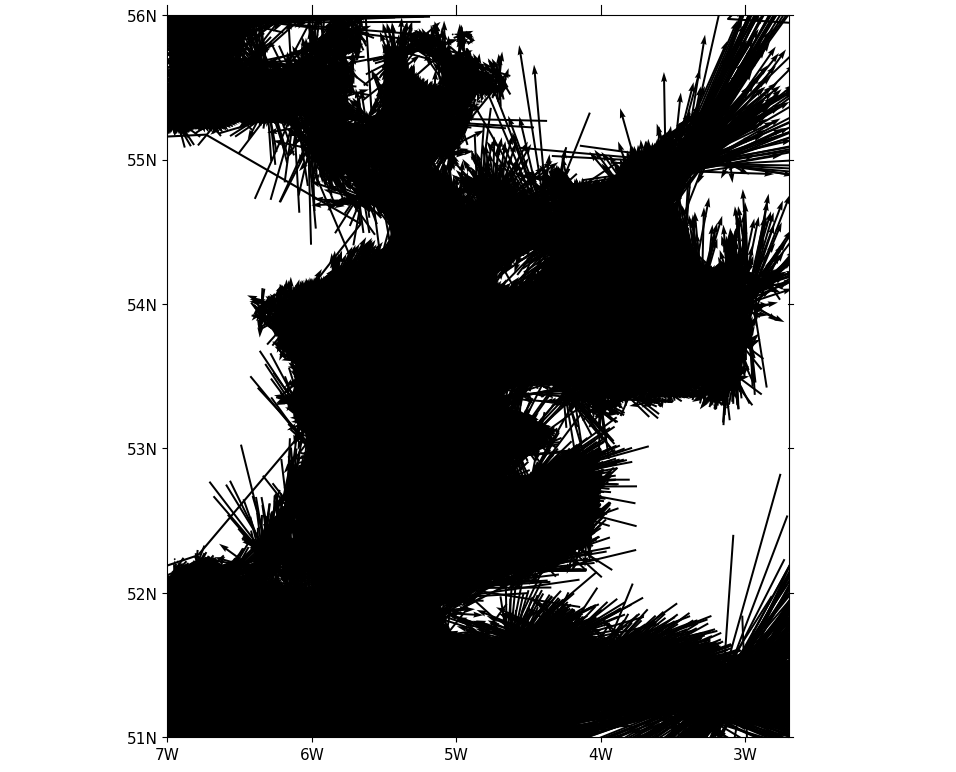

In [54]:
cfp.vect(u=eastward_component_field_last_time, v=northward_component_field_last_time)

**4.c.6)** Customise the plot you just made, in particular so that the vector lines are legible through adjusting the spacing and size at which they are plotted and by running, before your call to the vector plotting function, `cfp.mapset(resolution="10m")` to increase the resolution of the country borders.

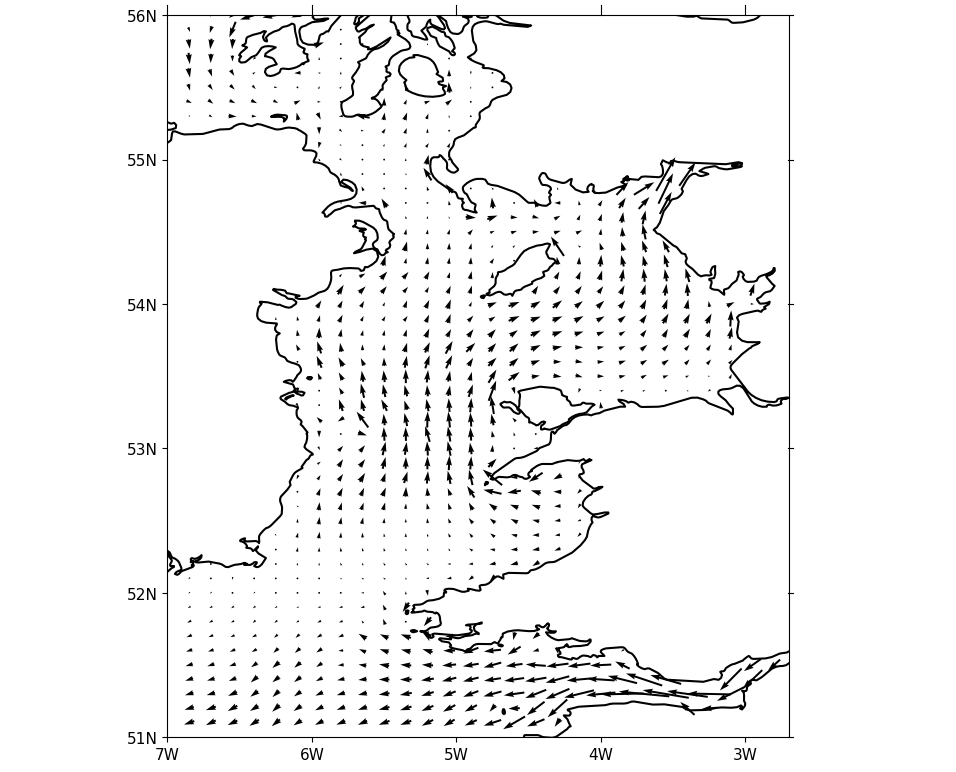

In [58]:
cfp.mapset(resolution="10m")
cfp.vect(u=eastward_component_field_last_time, v=northward_component_field_last_time, scale=3, stride=6)

***

## 5. Analysing data: applying mathematical and statistical operations and plotting trends

**In this section we demonstrate how to do some data analysis including performing arithmetic and statistical calculations on the data, showing how cf-python's CF Conventions metadata awareness means that the metadata is automatically updated to account for the operations that are performed.**

### a) Applying mathematics e.g. arithmetic and trigonometry on fields

**5.a.1)**

**5.a.2)**

**5.a.3)**

**5.a.4)**

### b) Line plotting

**5.b.1)**

In [ ]:
no2_emissions_field = cf.read("../ncas_data/n2o_emissions.nc")[0]
cfp.lineplot(no2_emissions_field)

**5.b.2)**

**5.b.3)**

**5.b.4)**

### c) Calculating seasonal means

**5.c.1)**

**5.c.2)**

**5.c.3)**

**5.c.4)**

### d) Plotting the seasonal means on one (line)plot

**5.d.1)**

**5.d.2)**

**5.d.3)**

**5.d.4)**

***

## 6. Changing the underlying grid of data through regridding

**In this section we demonstrate how to change the underlying grid of the data to another grid which could be a higher- or lower- resolution one, or a completely different grid, which is called regridding or interpolation, and indicate various options cf-python supports for doing this.**

### a) Getting a _source_ field ready to regrid

**6.a.1)**

**6.a.2)**

**6.a.3)**

**6.a.4)**

### b) Getting the _destination_ field: another field in order to regrid the previous _onto its grid_

**6.b.1)**

**6.b.2)**

**6.b.3)**

**6.b.4)**

### c) Performing the regrid operation from the source to the destination fields

**6.c.1)**

**6.c.2)**

**6.c.3)**

**6.c.4)**

### d) Finally, some more advanced cf-plot plotting to compare the source, destination, and regridded results

**6.d.1)**

**6.d.1)**

**6.d.3)**

**6.d.4)**

***